# Cali Prices dataset

In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame = True)

#print(california_housing.DESCR)

In [8]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# features
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# target
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
pd.DataFrame({"values":{col:df[col].unique() for col in df},'type':{col:df[col].dtype for col in df}})

In [ ]:
california_housing

## Data Viz

Text(0.5, 0, 'Histogram of each column')

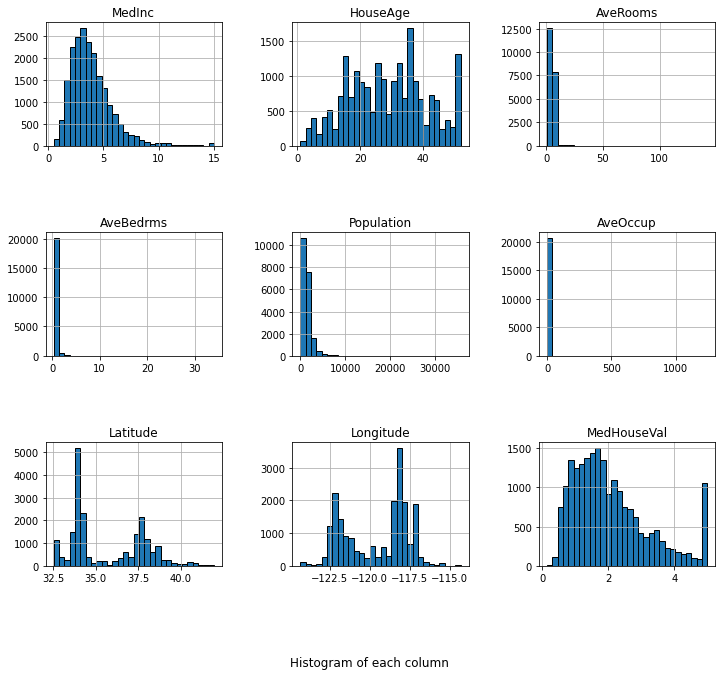

In [37]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize = (12, 10), bins = 30, edgecolor = "black")
plt.subplot
plt.subplots_adjust(hspace = 0.7, wspace = 0.4)
plt.suptitle('Histogram of each column', y = 0) #1.02

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

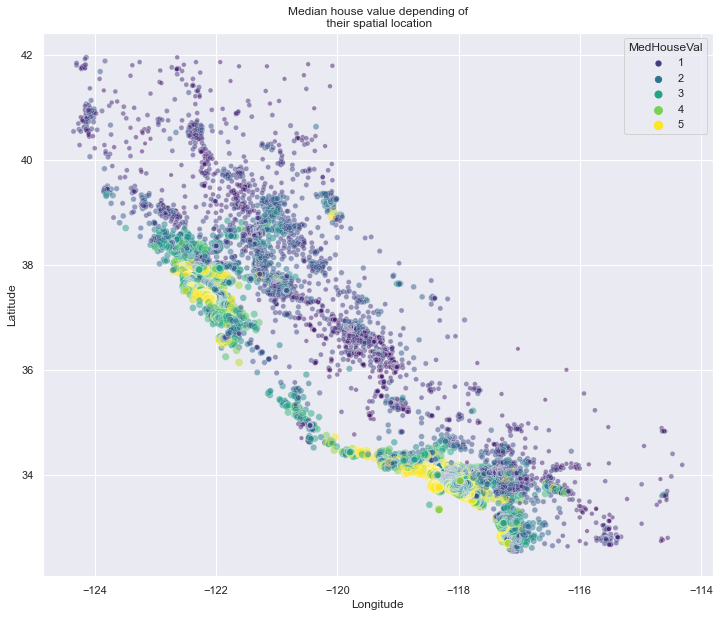

In [46]:
import seaborn as sns

#set figure size for seaborn
sns.set(rc = {'figure.figsize':(12, 10)})

sns.scatterplot(
    data = california_housing.frame, 
    x = "Longitude", y = "Latitude", 
    size = "MedHouseVal", hue = "MedHouseVal",
    palette = "viridis", alpha = 0.5
    )

plt.title("Median house value depending of\n their spatial location")

In [47]:
#We can do a random subsampling to have less data points to plot but that could still allow us to see these specificities.

import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size = 500, replace = False)

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

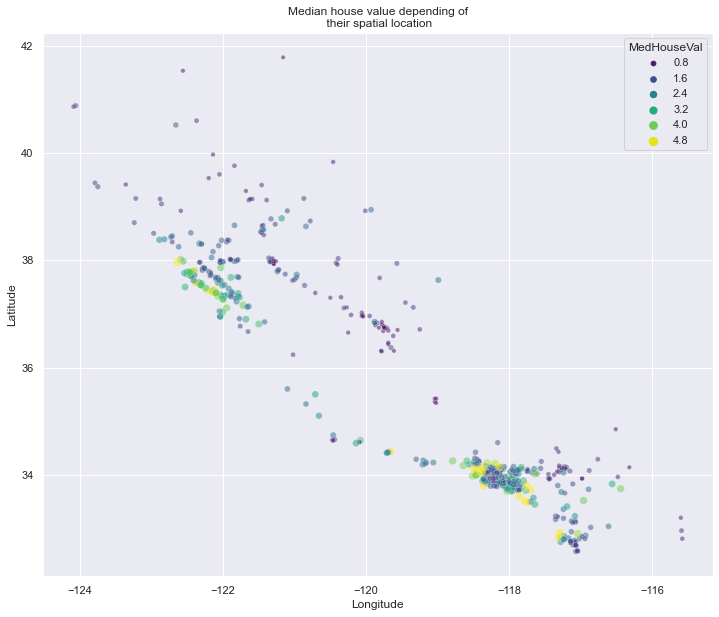

In [48]:
sns.scatterplot(
    data = california_housing.frame.iloc[indices],
    x = "Longitude", y = "Latitude",
    size = "MedHouseVal", hue = "MedHouseVal",
    palette = "viridis", alpha = 0.5
    )

plt.title("Median house value depending of\n their spatial location")

In [55]:
#drop long and lat columns
subset = california_housing.frame.iloc[indices].drop(
    columns = ["Longitude", "Latitude"])

# quantize the target

subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins = False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

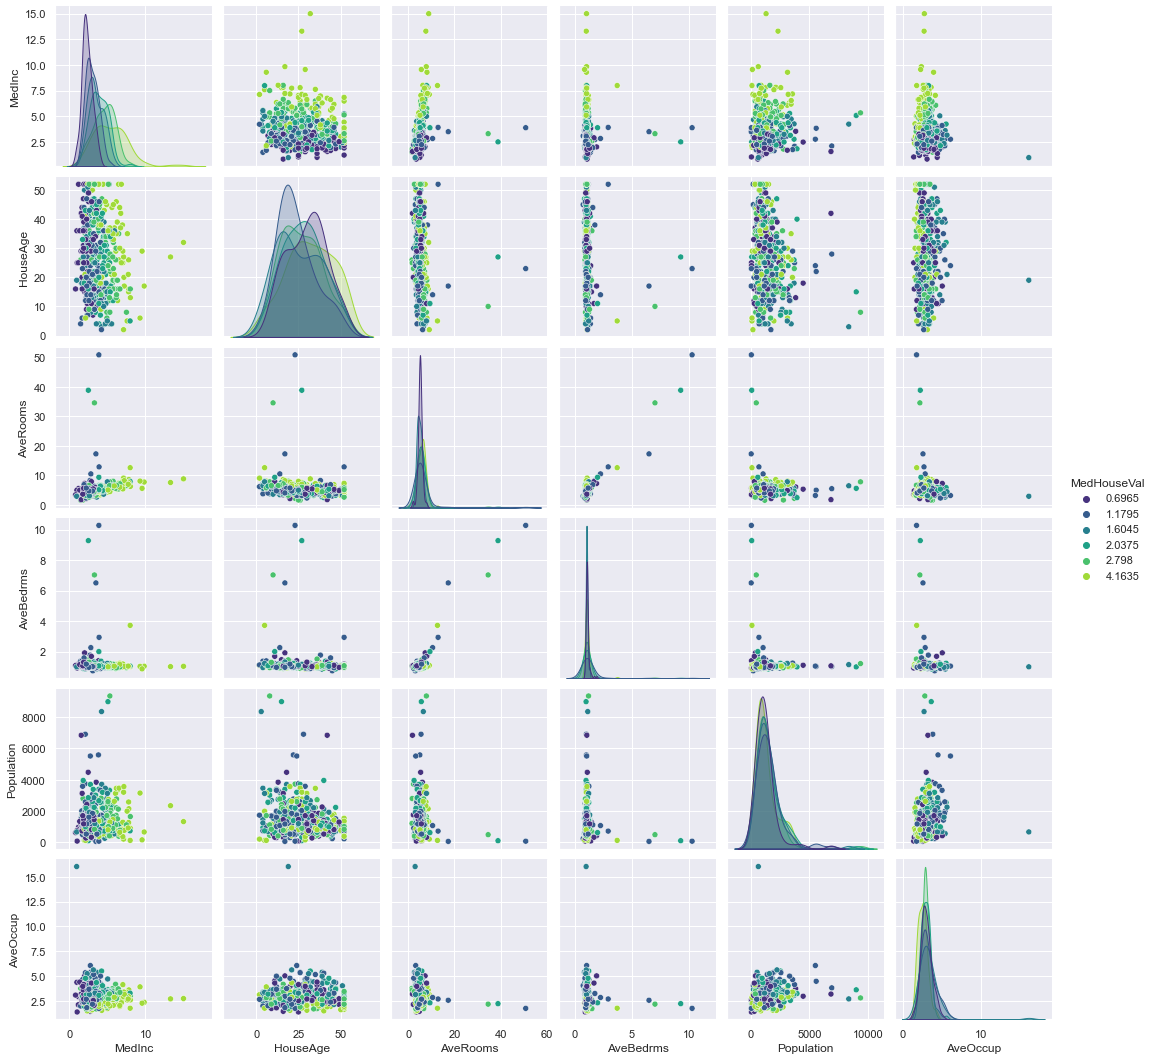

In [56]:
sns.pairplot(data = subset, hue = "MedHouseVal", palette = "viridis")

## Splitting Data  

The data is already split, with the target being the median house value. We will use the convention of `X` being the features and `y` being the target.

In [29]:
X = california_housing.data
y = california_housing.target

f"X shape is {X.shape}, " \
f"y shape is {y.shape}."

'X shape is (20640, 8), y shape is (20640,).'

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 20012017)

f"X_train shape is {X_train.shape}, " \
f"X_test shape is {X_test.shape}, " \
f"y_train shape is {y_train.shape} "  \
f"y_test shape is {y_test.shape}."

'X_train shape is (16512, 8), X_test shape is (4128, 8), y_train shape is (16512,) y_test shape is (4128,).'

In [34]:
X_train.AveRooms.quantile(0.75)

6.0575797239409805

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num = 30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas = alphas))
cv_results = cross_validate(
    model, X, y,
    return_estimator = True, n_jobs = 2)

In [58]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} +/- {score.std():.3f}")

R2 score: 0.553 +/- 0.062


In [59]:
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names
)

Text(0.5, 1.0, 'Coefficients of Ridge models\n via cross-validation')

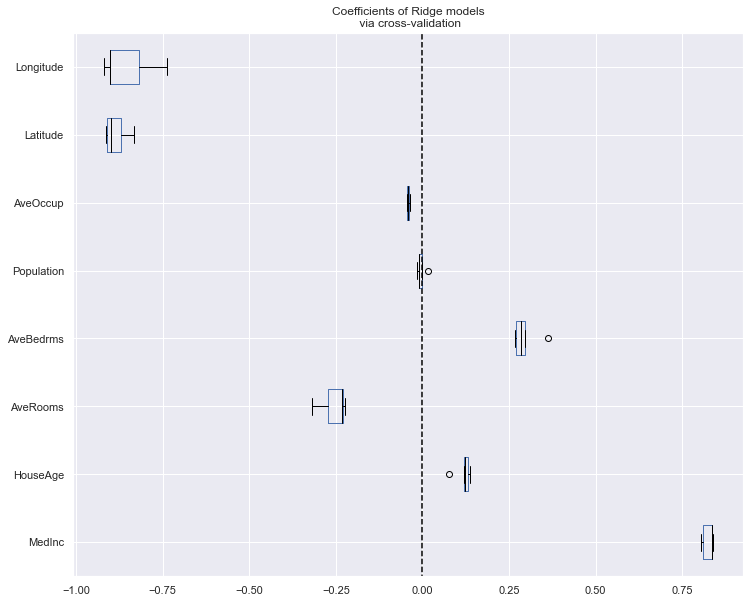

In [60]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert = False, color = color)

plt.axvline(
    x = 0, ymin = -1, ymax = 1, 
    color = "black", linestyle = "--")

plt.title("Coefficients of Ridge models\n via cross-validation")